In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use("seaborn")

%matplotlib inline

# Training Data

In [2]:
root_dir = "data/train"

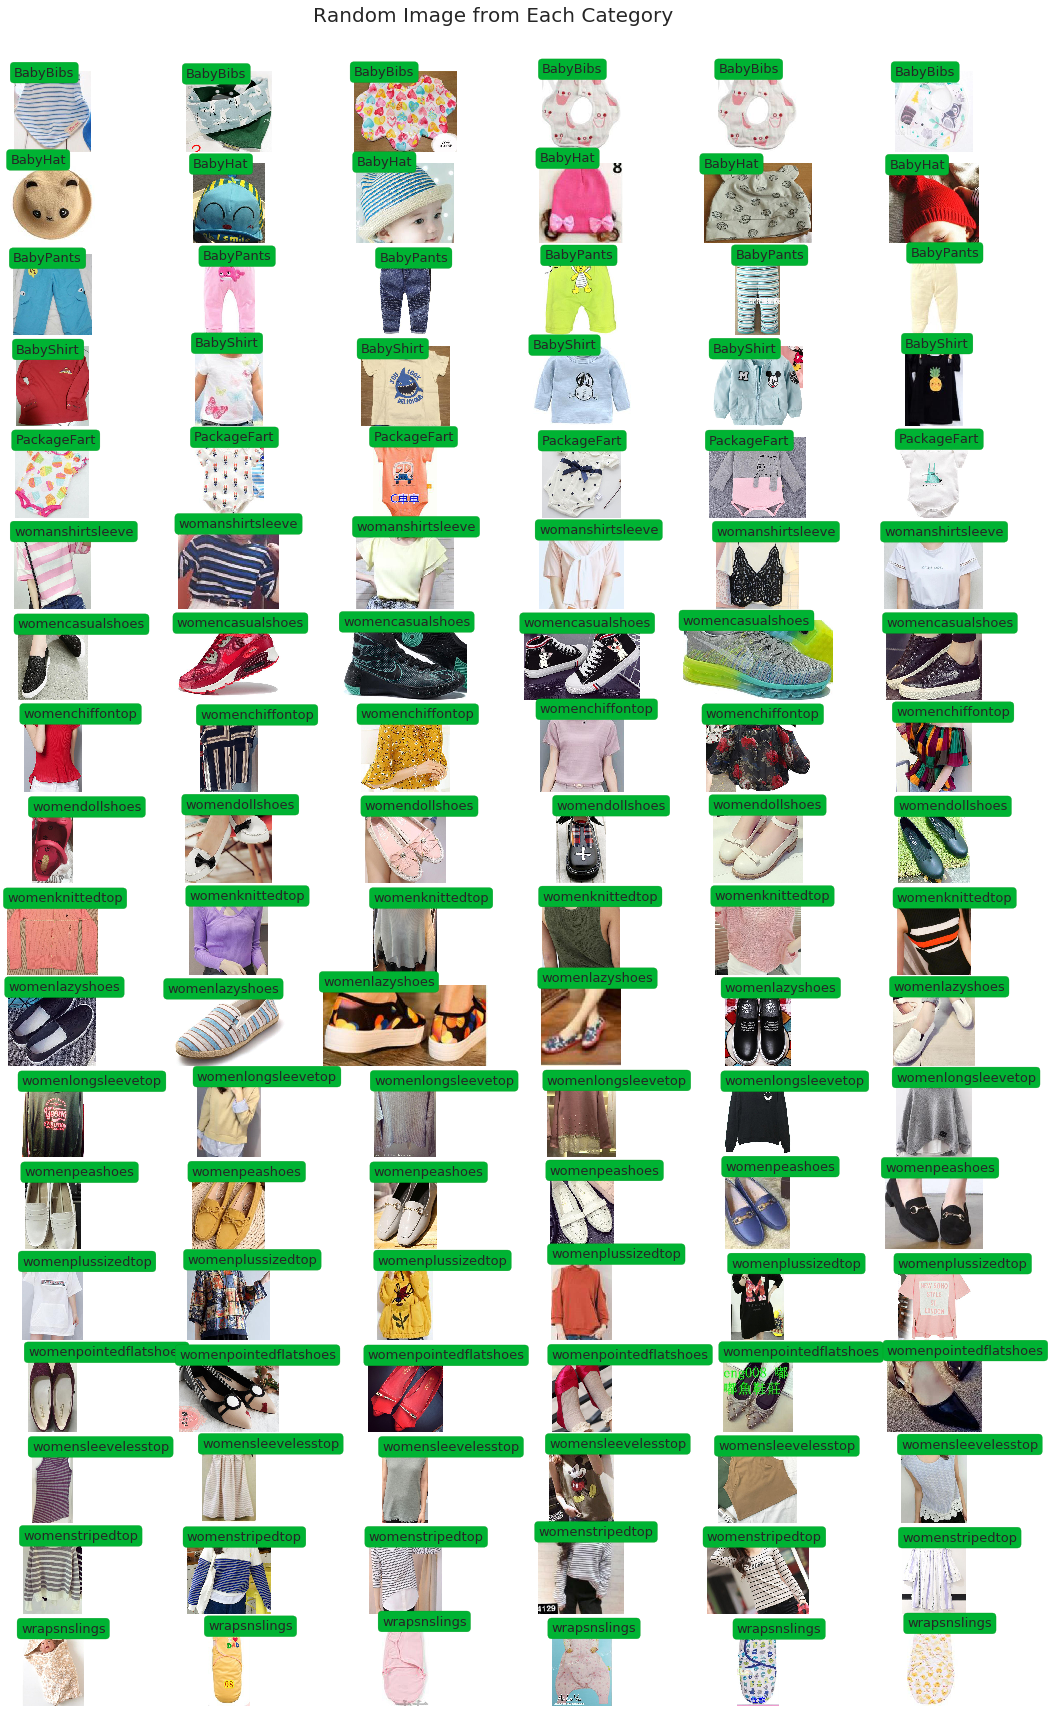

In [3]:
categoryAmount = {}
categoryAmount["category"] = []
categoryAmount["no_of_images"] = []

sorted_food_dirs = sorted(os.listdir(root_dir))

rows = len(sorted_food_dirs)
cols = 6
fig, ax = plt.subplots(rows, cols, frameon=False, figsize=(15, 25))
fig.suptitle('Random Image from Each Category', fontsize=20)

for i in range(rows):
    food_dir = sorted_food_dirs[i]
    all_files = os.listdir(os.path.join(root_dir, food_dir))
    categoryAmount["category"].append(food_dir)
    categoryAmount["no_of_images"].append(len(all_files))
    for j in range(cols):
        rand_img = np.random.choice(all_files)
        img = plt.imread(os.path.join(root_dir, food_dir, rand_img))
        ax[i][j].imshow(img)
        ec = (0, .6, .1)
        fc = (0, .7, .2)
        ax[i][j].text(0, -20, food_dir, size=13, rotation=0,
                      ha="left", va="top", bbox=dict(boxstyle="round", ec=ec, fc=fc))

plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Number of images: 38211


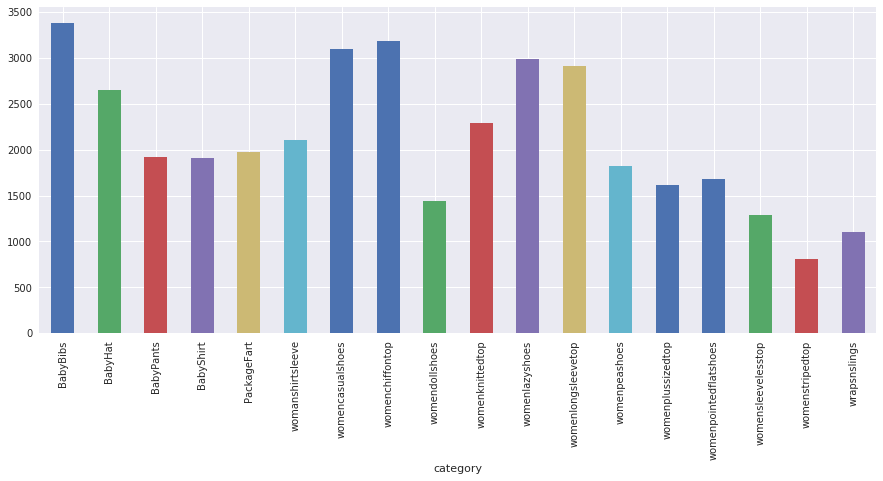

In [4]:
categoryAmount = pd.DataFrame(categoryAmount)
print("Number of images:", categoryAmount.no_of_images.sum())

categoryAmount.plot(x="category", y="no_of_images", kind="bar", figsize=(15, 6), legend=False)

(34204, 2)


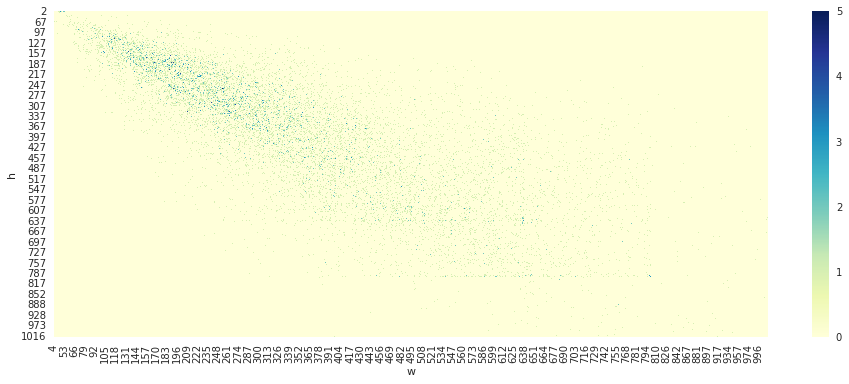

In [5]:
shapes = []
for i in range(rows):
    food_dir = sorted_food_dirs[i]
    for file in glob.glob(os.path.join(root_dir, food_dir, "*")):
        try:
            img = plt.imread(file)
            shapes.append("x".join([str(x) for x in img.shape]))
        except:
            print(file, "is broken.")

shapesDf = Counter(shapes)
df = pd.DataFrame(list(zip(shapesDf.keys(), shapesDf.values())), columns=["shapes", "no_of_images"])
print(df.shape)

df1 = pd.DataFrame(df.shapes.str.split("x").tolist(), columns=["h", "w", "c"])
df1["no_of_images"] = df.no_of_images
df1["h"] = df1.h.astype(int)
df1["w"] = df1.w.astype(int)
df1["c"] = df1.c.astype(int)

fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(df1.pivot("h", "w", "no_of_images").fillna(0), ax=ax, cmap="YlGnBu")

# Test data

In [6]:
root_dir = "data/test"

Number of images: 16111
(15343, 2)


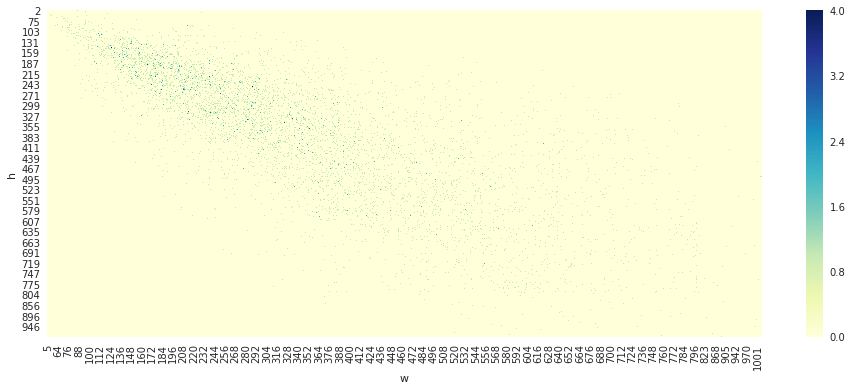

In [7]:
categoryAmount = {}
categoryAmount["category"] = []
categoryAmount["no_of_images"] = []

shapes = []

for file in glob.glob(os.path.join(root_dir, "*")):
    try:
        img = plt.imread(file)
        shapes.append("x".join([str(x) for x in img.shape]))
    except:
        print(file, "is broken.")
        
print("Number of images:", len(shapes))
            
shapesDf = Counter(shapes)
df = pd.DataFrame(list(zip(shapesDf.keys(), shapesDf.values())), columns=["shapes", "no_of_images"])
print(df.shape)

df1 = pd.DataFrame(df.shapes.str.split("x").tolist(), columns=["h", "w", "c"])
df1["no_of_images"] = df.no_of_images
df1["h"] = df1.h.astype(int)
df1["w"] = df1.w.astype(int)
df1["c"] = df1.c.astype(int)

fig, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(df1.pivot("h", "w", "no_of_images").fillna(0), ax=ax, cmap="YlGnBu")